In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix, classification_report

In [3]:
## MNIST  # uncomment to use MNIST
# data_id = 554
# class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

In [4]:
## Fashion MNIST  # uncomment to use Fashion MNIST
data_id = 40996
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
               "Shirt", "Sneaker", "Bag", "AnkleBoot"]

In [42]:
X_all,y_all = fetch_openml(data_id=data_id, return_X_y=True, as_frame=False, parser='auto') # will return numpy arrays

In [67]:
# Use only a subset for binary classification
index = np.where((y_all == "0") | (y_all == "6"))[0]
X = X_all[index].copy()
y = y_all[index].copy()

# X = X_all.copy()
# y = y_all.copy()

In [68]:
# Scale the X's
if X.max() > 1:
    X = X/255
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test = X[:60000], X[60000:]
# y_train, y_test = y[:60000], y[60000:]

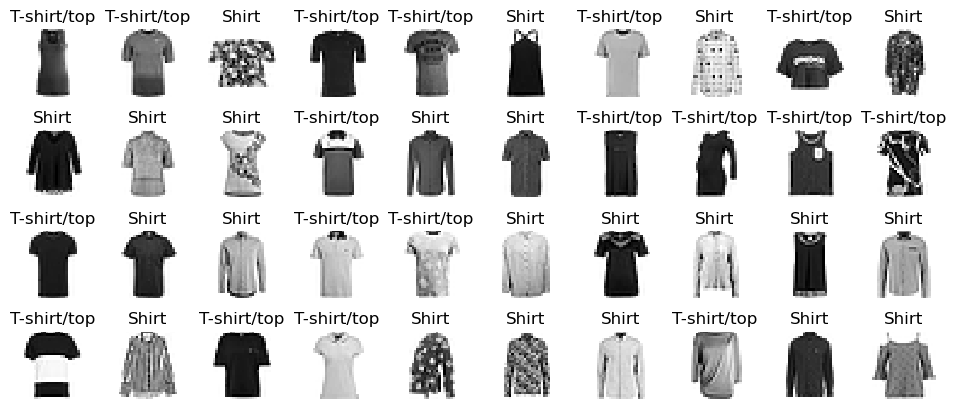

In [69]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index].reshape(28,28), cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[int(y_train[index])])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [119]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [120]:
yhat_train = model.predict(X_train)
yhat = model.predict(X_test)

In [121]:
print(accuracy_score(y_train, yhat_train))
print(accuracy_score(y_test, yhat))

0.8457142857142858
0.8278571428571428


In [122]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84      1379
           6       0.89      0.76      0.82      1421

    accuracy                           0.83      2800
   macro avg       0.84      0.83      0.83      2800
weighted avg       0.84      0.83      0.83      2800



In [123]:
confusion_matrix(y_test, yhat,)

array([[1244,  135],
       [ 347, 1074]])

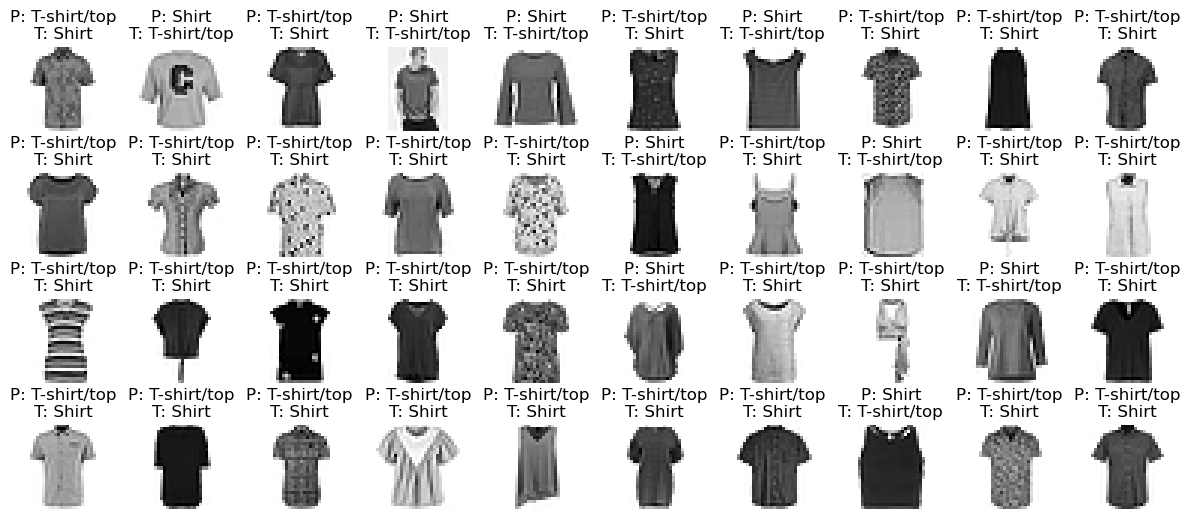

In [124]:
### Look at some misclassified points 

misclassified_indices = np.where(yhat != y_test)[0]

n_rows = 4
n_cols = 10
n_plots = n_rows * n_cols


plot_indices = misclassified_indices[:n_plots]

plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))

for i, misclassified_index in enumerate(plot_indices):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(X_test[misclassified_index].reshape(28,28), cmap="binary", interpolation="nearest")
    plt.axis('off')
    # Title with predicted (wrong) and true labels
    plt.title(f"P: {class_names[int(yhat[misclassified_index])]}\nT: {class_names[int(y_test[misclassified_index])]}")

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


In [126]:
model.feature_importances_.shape

(784,)

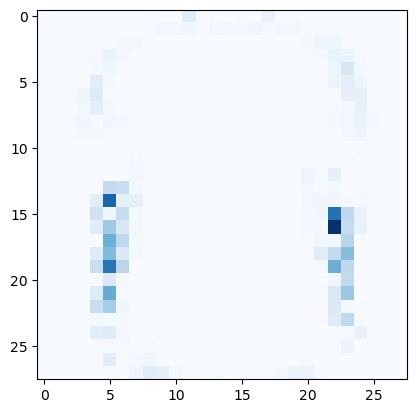

In [ ]:
plt.imshow(model.feature_importances_.reshape(28,28),  cmap='Blues', interpolation="nearest");